### Описание данных

#### user_data:

client – идентификатор пользователя

premium – является ли клиент премиум статуса

age – возраст клиента


#### logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix

In [1]:
import pandas as pd

### Загрузка данных

In [2]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [3]:
user_data.shape

(2954, 3)

In [4]:
user_data.head(5)

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
logs.shape

(4500, 4)

In [6]:
logs.head(5)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


Какие уникальные значения принимает переменная platform?

In [7]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

Какой клиент (id) совершил больше всего успешных операций?

In [8]:
max_success = logs.query('success == True') \
                 .groupby('client', as_index=False) \
                 .agg({'success': 'count'}) \
                 .rename(columns={'success': 'success_count'})
max_success_count = max_success.success_count.max()
max_success_count

41

In [9]:
max_success.query('success_count == 41') \
           .client.to_list()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы осуществляется наибольшее количество успешных операций?

In [10]:
logs.query('success == True') \
    .groupby('platform') \
    .agg({'success': 'count'}) \
    .rename(columns={'success': 'success_count'}) \
    .sort_values('success_count', ascending=False)

,success_count
platform,
phone,2019
computer,1090
tablet,180


Какая платформа наиболее популярна среди премиумных клиентов?

In [11]:
logs.merge(user_data, how='inner', on='client') \
    .query('premium == True') \
    .groupby('platform') \
    .agg({'platform': 'count'}) \
    .rename(columns={'platform': 'premium_clien_count'}) \
    .sort_values('premium_clien_count', ascending=False)

,premium_clien_count
platform,
phone,246
computer,150
tablet,24


Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [12]:
logs_user_data = logs.merge(user_data, how='inner', on='client')

In [13]:
logs_user_data.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

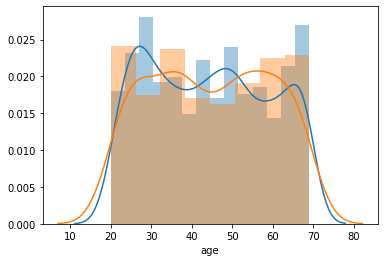

In [15]:
sns.distplot(logs_user_data.query('premium == False').age)
sns.distplot(logs_user_data.query('premium == True').age)

Постройте график распределения числа успешных операций: 

x – число успешных операций

y – число клиентов, совершивших столько успешных операций

In [17]:
client_success_count = logs_user_data.query('success == True') \
                           .groupby('client', as_index=False) \
                           .agg({'success': 'count'}) \
                           .rename(columns={'success': 'success_count'}) \
                           .sort_values('success_count', ascending=False)
client_success_count

,client,success_count
250,12179,41
737,36165,41
588,28719,41
1280,61473,41
1279,61468,41
...,...,...
702,34642,1
701,34640,1
700,34630,1
699,34615,1


In [18]:
client_success_count.groupby('success_count', as_index=False) \
                                 .agg({'client': 'count'})

,success_count,client
0,1,2051
1,2,42
2,3,1
3,40,1
4,41,9


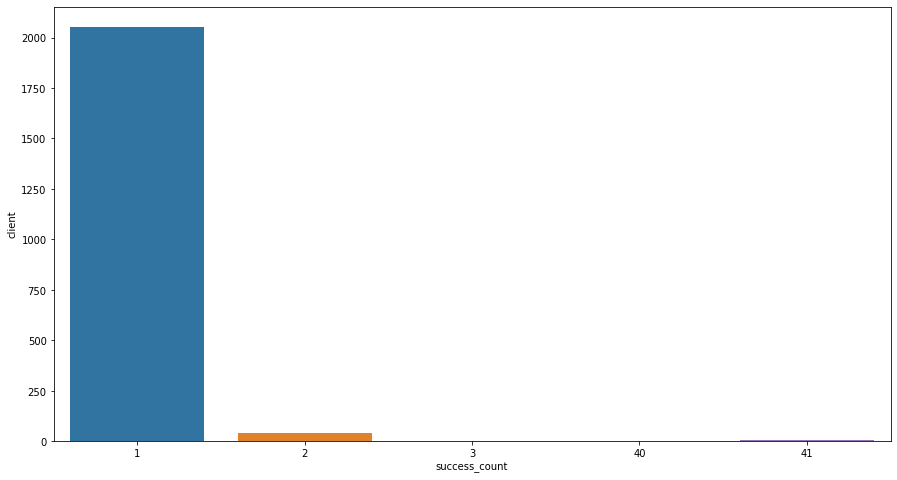

In [20]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x='success_count', y='client', data = client_success_count.groupby('success_count', as_index=False) \
                                 .agg({'client': 'count'}))

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста. По оси x – возраст, y – число успешных операций.

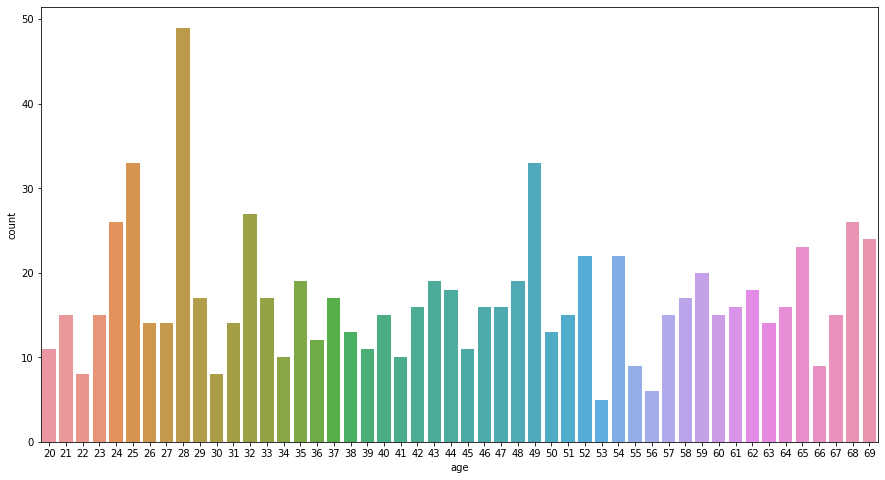

In [22]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='age', data = logs_user_data.query('platform == "computer" & success == True'))